# **1. 데이터 전처리 및 EDA**

In [1]:
#데이터 불러오기

import pandas as pd

from google.colab import drive
drive.mount('/content/drive')

filename = '/content/drive/My Drive/startup data.csv'
df = pd.read_csv(filename)

print(df.shape)
df.head()


Mounted at /content/drive
(923, 49)


,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,labels,...,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
0,1005,CA,42.358880,-71.056820,92101,c:6669,San Diego,NaN,Bandsintown,1,...,c:6669,0,1,0,0,0,0,1.0000,0,acquired
1,204,CA,37.238916,-121.973718,95032,c:16283,Los Gatos,NaN,TriCipher,1,...,c:16283,1,0,0,1,1,1,4.7500,1,acquired
2,1001,CA,32.901049,-117.192656,92121,c:65620,San Diego,San Diego CA 92121,Plixi,1,...,c:65620,0,0,1,0,0,0,4.0000,1,acquired
3,738,CA,37.320309,-122.050040,95014,c:42668,Cupertino,Cupertino CA 95014,Solidcore Systems,1,...,c:42668,0,0,0,1,1,1,3.3333,1,acquired
4,1002,CA,37.779281,-122.419236,94105,c:65806,San Francisco,San Francisco CA 94105,Inhale Digital,0,...,c:65806,1,1,0,0,0,0,1.0000,1,closed


In [2]:
#결측치 & 데이터 타입 확인

print(df.dtypes)
print(df.isnull().sum())


Unnamed: 0                    int64
state_code                   object
latitude                    float64
longitude                   float64
zip_code                     object
id                           object
city                         object
Unnamed: 6                   object
name                         object
labels                        int64
founded_at                   object
closed_at                    object
first_funding_at             object
last_funding_at              object
age_first_funding_year      float64
age_last_funding_year       float64
age_first_milestone_year    float64
age_last_milestone_year     float64
relationships                 int64
funding_rounds                int64
funding_total_usd             int64
milestones                    int64
state_code.1                 object
is_CA                         int64
is_NY                         int64
is_MA                         int64
is_TX                         int64
is_otherstate               

In [3]:
# 전처리 : 결측치 제거

df = df.fillna(0)
df.isnull().sum()

Unnamed: 0                  0
state_code                  0
latitude                    0
longitude                   0
zip_code                    0
id                          0
city                        0
Unnamed: 6                  0
name                        0
labels                      0
founded_at                  0
closed_at                   0
first_funding_at            0
last_funding_at             0
age_first_funding_year      0
age_last_funding_year       0
age_first_milestone_year    0
age_last_milestone_year     0
relationships               0
funding_rounds              0
funding_total_usd           0
milestones                  0
state_code.1                0
is_CA                       0
is_NY                       0
is_MA                       0
is_TX                       0
is_otherstate               0
category_code               0
is_software                 0
is_web                      0
is_mobile                   0
is_enterprise               0
is_adverti

In [4]:
#전처리 data type 바꾸기

def toInt(string):
    return int(string.replace('/',''))

df['founded_at'] = df['founded_at'].apply(toInt)
df['first_funding_at'] = df['first_funding_at'].apply(toInt)
df['last_funding_at'] = df['last_funding_at'].apply(toInt)


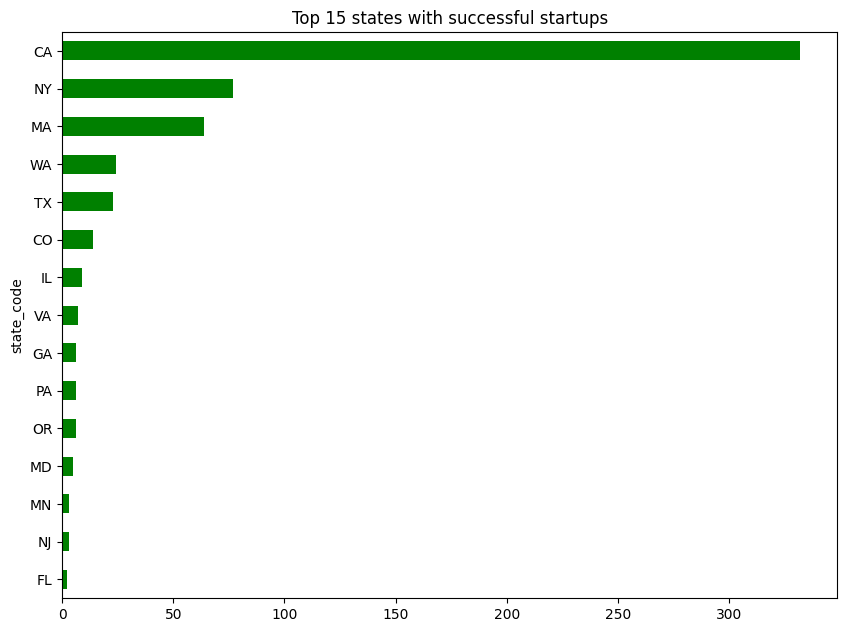

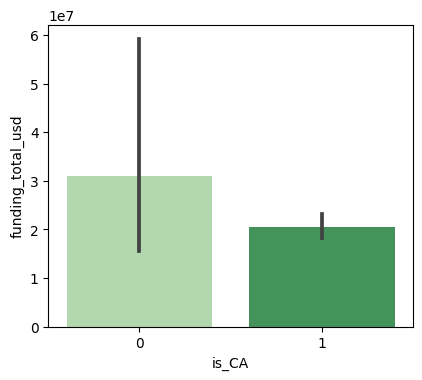

In [35]:
#EDA

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## 가설1 :실리콘벨리 등 특정 지역(CA, NY 등)에 속한 스타트업은 인수될 확률이 높을 것이다.

# 인수된 스타트업이 위치하고 있는 주
states_success = df.groupby(by = 'state_code')['labels'].sum()

n = 15
plt.figure(figsize=(10,n/2))
plt.title(f'Top {n} states with successful startups')
states_success.sort_values()[-n:].plot.barh(color = 'green');

plt.figure(figsize=(16,4),dpi=100)

plt.subplot(1,3,1)
sns.barplot(df["is_CA"], df["funding_total_usd"], palette="Greens")

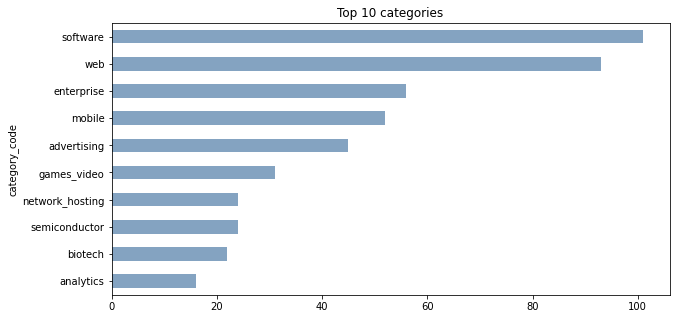

In [5]:
## 가설2 : 최근 산업 트렌드를 고려했을 때 특정 업종(Software, Web, Mobile 등)에 속한 스타트업이 인수될 확률이 높을 것이다.

# 인수된 스타트업의 주요 업종
category = df.groupby(by = 'category_code')['labels'].sum()

n = 10
plt.figure(figsize=(10,n/2))
plt.title(f'Top {n} categories')
category.sort_values()[-n:].plot.barh(color=(0.2, 0.4, 0.6, 0.6));


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


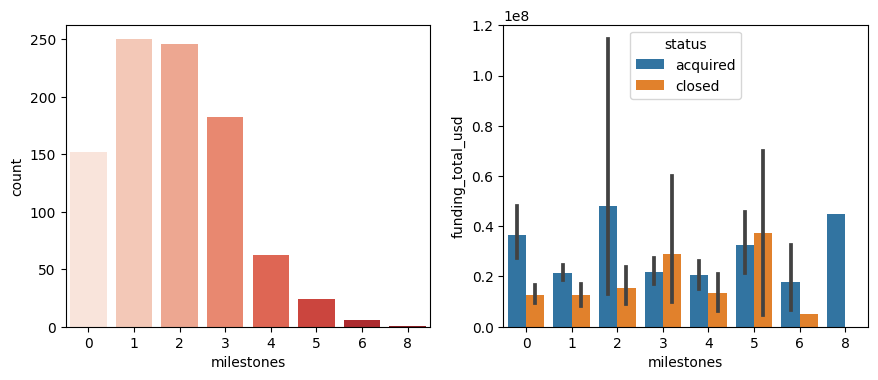

In [6]:
##가설3 : milestone의 숫자가 클수록 인수될 확률이 높을 것이다 -> 무조건 높을수록 좋은건 아님! 1~3정도가 가장 적합

plt.figure(figsize=(16,4),dpi=100)

plt.subplot(1,3,1)
sns.countplot(df.milestones, palette="Reds");

plt.subplot(1,3,2)
sns.barplot(x="milestones", y="funding_total_usd", hue="status", data=df)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


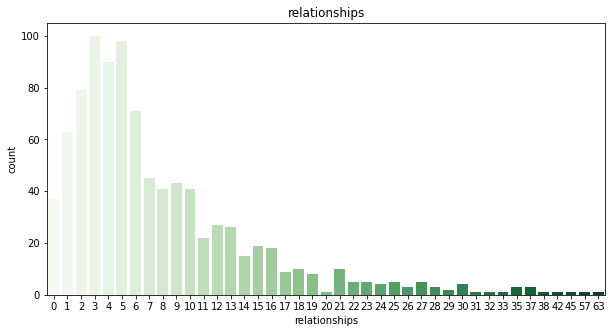

In [7]:
##가설4 : relationships의 숫자가 클수록 인수될 확률이 높을 것이다 -> 무조건 클수록 좋은건 아님! 3~6정도가 적합

relationships = df.groupby(by='relationships')['labels'].sum()
n = 10
plt.figure(figsize=(10,n/2))
plt.title('relationships')
sns.countplot(df.relationships, palette="Greens");


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


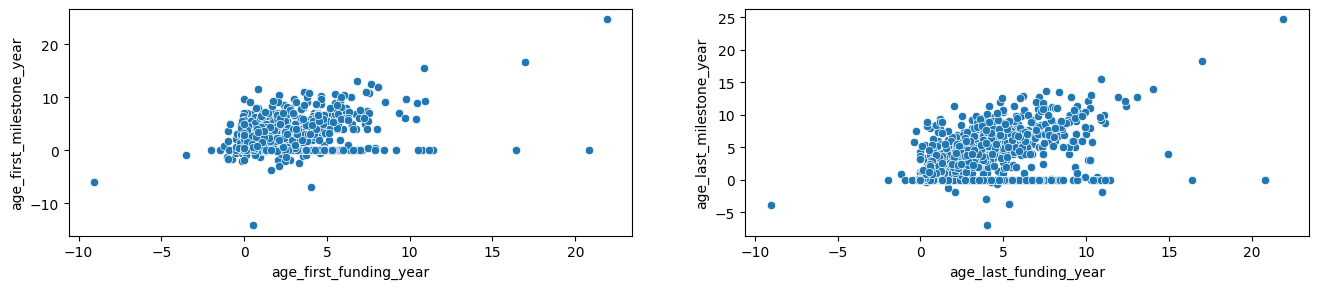

In [8]:
#Funding Year과 Milestone Year의 관계

plt.figure(figsize=(16,3),dpi=100)

plt.subplot(1,2,1)
sns.scatterplot(df["age_first_funding_year"], df["age_first_milestone_year"])

plt.subplot(1,2,2)
sns.scatterplot(df["age_last_funding_year"], df["age_last_milestone_year"]);


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


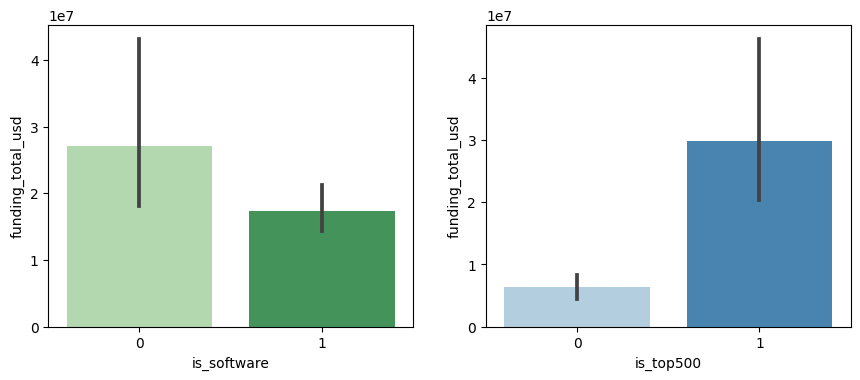

In [9]:
#소프트웨어 업계 여부와 top500 여부에 따른 펀딩금액

plt.figure(figsize=(16,4),dpi=100)

plt.subplot(1,3,1)
sns.barplot(df["is_software"], df["funding_total_usd"], palette="Greens")

plt.subplot(1,3,2)
sns.barplot(df["is_top500"], df["funding_total_usd"], palette="Blues")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


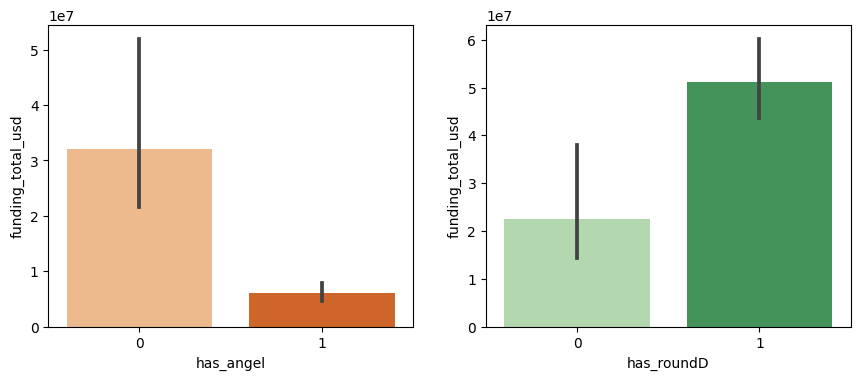

In [10]:
# 투자 Series 단계에 따른 펀딩금액

plt.figure(figsize=(16,4),dpi=100)

plt.subplot(1,3,1)
sns.barplot(df["has_angel"], df["funding_total_usd"], palette="Oranges")

plt.subplot(1,3,2)
sns.barplot(df["has_roundD"], df["funding_total_usd"], palette="Greens")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


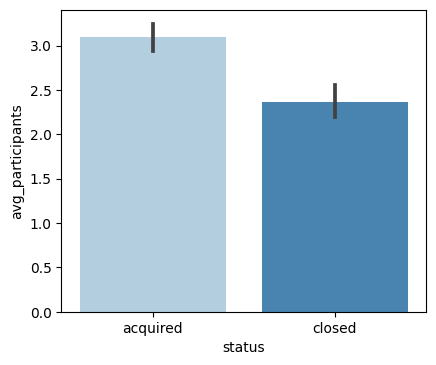

In [11]:
# 평균 참가자수와 인수여부

plt.figure(figsize=(16,4),dpi=100)

plt.subplot(1,3,1)
sns.barplot(df["status"], df["avg_participants"], palette="Blues") #X, y 순서를 바꾸어주면 bar/barh를 바꿀 수 있다!

In [13]:
#Feature Engineering

df['funding_to_milestone_first'] = df['age_first_milestone_year'] - df['age_first_funding_year']
df['funding_to_milestone_last'] = df['age_last_milestone_year'] - df['age_last_funding_year']

df['age_diff_funding_year'] = df['age_last_funding_year'] - df['age_first_funding_year']
df['age_diff_milestone_year'] = df['age_last_milestone_year'] - df['age_first_milestone_year']

df.shape

(923, 53)

In [12]:
#X,y 나누어주기 및 Feature Selection

X = df.drop(columns = ['labels','status']) 
y = df['labels']

X.shape

(923, 47)

In [13]:
#Train, Validation, Test 셋으로 나누어주기

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=0.8, test_size=0.2, random_state=2)

X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, train_size=0.8, test_size=0.2, random_state=2)

print(X_train.shape)
print(X_val.shape)
print(X_test.shape)
print(y_train.shape)
print(y_val.shape)
print(y_test.shape)

X_train.head()

(590, 47)
(148, 47)
(185, 47)
(590,)
(148,)
(185,)


,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,founded_at,...,is_othercategory,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500
527,921,MA,42.491730,-71.281795,1730,c:56568,Bedford,Bedford MA 1730,Sionex,1/1/2001,...,1,c:56568,0,0,0,0,1,0,4.0,1
64,396,MA,42.360253,-71.058291,02111-1720,c:23533,Boston,Boston MA 02111-1720,CardStar,12/1/2008,...,0,c:23533,0,0,1,0,0,0,3.0,1
612,146,CA,37.417002,-122.078710,94043,c:15122,Mountain View,0,Kace networks,1/1/2003,...,0,c:15122,1,0,0,1,0,0,1.5,1
668,2,NY,40.745064,-73.992637,10001,c:101312,New York,0,SideTour,6/1/2011,...,0,c:101312,0,1,1,0,0,0,2.0,1
82,863,CO,40.397761,-105.074980,80538,c:51023,Loveland,Loveland CO 80538,Abound Solar,1/1/2007,...,1,c:51023,1,0,0,0,0,0,2.5,1


In [14]:
#Drop Columns

#Categorical 변수 위주로 남기기
X1_train = X_train.drop((df.loc[:, 'Unnamed: 0':'Unnamed: 6'].columns) | (df.loc[:, 'founded_at':'state_code.1'].columns),  axis = 1)
X1_train = X1_train.drop(columns=['category_code', 'object_id'])

X1_val = X_val.drop((df.loc[:, 'Unnamed: 0':'Unnamed: 6'].columns) | (df.loc[:, 'founded_at':'state_code.1'].columns),  axis = 1)
X1_val = X1_val.drop(columns=['category_code', 'object_id'])

X1_test = X_test.drop((df.loc[:, 'Unnamed: 0':'Unnamed: 6'].columns) | (df.loc[:, 'founded_at':'state_code.1'].columns),  axis = 1)
X1_test = X1_test.drop(columns=['category_code', 'object_id'])

#Numerical 변수 위주로 남기기
X2_train = X_train.drop((df.loc[:, 'object_id':'has_roundD'].columns) | (df.loc[:, 'Unnamed: 0':'Unnamed: 6'].columns), axis = 1)
X2_train = X2_train.drop(columns = ['founded_at', 'first_funding_at', 'last_funding_at', 'name', 'closed_at', 'state_code.1', 'category_code'])

X2_val = X_val.drop((df.loc[:, 'object_id':'has_roundD'].columns) | (df.loc[:, 'Unnamed: 0':'Unnamed: 6'].columns), axis = 1)
X2_val = X2_val.drop(columns = ['founded_at', 'first_funding_at', 'last_funding_at', 'name', 'closed_at', 'state_code.1', 'category_code'])

X2_test = X_test.drop((df.loc[:, 'object_id':'has_roundD'].columns) | (df.loc[:, 'Unnamed: 0':'Unnamed: 6'].columns), axis = 1)
X2_test = X2_test.drop(columns = ['founded_at', 'first_funding_at', 'last_funding_at', 'name', 'closed_at', 'state_code.1', 'category_code'])

print(X1_train.shape)
print(X2_train.shape)
X2_train.head()


(590, 24)
(590, 25)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical o

,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,is_CA,is_NY,...,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,avg_participants,is_top500
527,4.9342,4.9342,0.0000,0.0000,2,1,12000000,1,0,0,...,0,0,0,0,0,0,0,1,4.0,1
64,1.3260,2.7836,1.6740,3.1342,5,3,2030882,2,0,0,...,0,0,0,0,0,0,0,0,3.0,1
612,2.5644,3.3890,8.1452,8.1452,7,2,11000000,1,1,0,...,0,0,0,0,0,0,0,0,1.5,1
668,0.0822,1.8164,1.0849,2.3014,7,3,4000000,2,0,1,...,0,0,0,0,0,0,0,0,2.0,1
82,3.5123,3.9562,3.9534,4.8356,5,2,510000000,3,0,0,...,0,0,0,0,0,0,0,1,2.5,1


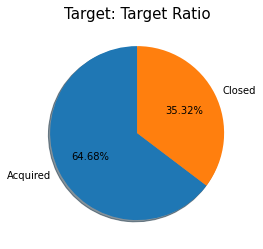

0    acquired
dtype: object

In [15]:
# 베이스라인 스코어(타겟 분포확인)

import matplotlib.pyplot as plt

baseline = df['status'].mode()

target_ratio = y.value_counts(normalize=True)

plt.pie(
      (target_ratio),
      labels=('Acquired', 'Closed'),
      autopct="%.2f%%",
      shadow=True,
      startangle=90,
  )
plt.title("Target: Target Ratio", size=15)
plt.show()

baseline #베이스라인(최빈값)의 평가점수(64.68%)보다 높은 점수가 나와야 한다! 

# **2. 머신러닝 방식 적용 및 교차검증**

In [16]:
#모델링 : XGBoost 모델

!pip install category_encoders
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report
from xgboost import XGBClassifier
from sklearn.impute import SimpleImputer
from category_encoders import OrdinalEncoder
from sklearn. preprocessing import OneHotEncoder
from scipy import stats
from scipy.stats import randint, uniform
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score

pipeline_xgb = make_pipeline(
OrdinalEncoder(),
SimpleImputer(missing_values = -1),
XGBClassifier(eval_metric = "logloss", use_label_encoder = False)
)
    
pipeline_xgb.fit(X2_train, y_train)

     |████████████████████████████████| 86 kB 3.0 MB/s 


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Pipeline(steps=[('ordinalencoder', OrdinalEncoder(cols=[], mapping=[])),
                ('simpleimputer', SimpleImputer(missing_values=-1)),
                ('xgbclassifier',
                 XGBClassifier(eval_metric='logloss',
                               use_label_encoder=False))])

In [17]:
##최적의 Hyperparameter찾기

##RandomSearchCV : XGB 모델

dists = {   
'simpleimputer__strategy': ['mean', 'constant', 'most_frequent', 'median'], 
'xgbclassifier__n_estimators': stats.randint(50, 500),
'xgbclassifier__learning_rate': [0.1,0.2,0.3],
'xgbclassifier__max_depth': [5, 10, 15, 20, None], 
'xgbclassifier__subsample': stats.uniform(0.3, 0.6),
}

clf = RandomizedSearchCV(
    pipeline_xgb, 
    param_distributions=dists, 
    n_iter=10, 
    cv=3, 
    scoring='roc_auc',  
    verbose=1,
    n_jobs=-1
)    

clf.fit(X2_train, y_train)
print("Optimal Hyperparameter:", clf.best_params_)
print("AUC:", clf.best_score_)
  

Fitting 3 folds for each of 10 candidates, totalling 30 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
3 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/usr/local/lib/python3.7/dist-packages/xgboost/sklearn.py", line 732, in fit
    callbacks=callbacks)
  File "/usr/local/lib/python3.7/dist-packages/xgboost/training

Optimal Hyperparameter: {'simpleimputer__strategy': 'median', 'xgbclassifier__learning_rate': 0.1, 'xgbclassifier__max_depth': 5, 'xgbclassifier__n_estimators': 171, 'xgbclassifier__subsample': 0.8037236603847229}
AUC: 0.7831355319715471


In [18]:
print('검증 정확도', pipeline_xgb.score(X2_val, y_val))
print('테스트 예측 결과', pipeline_xgb.score(X2_test, y_test))

y_pred = pipeline_xgb.predict(X2_test)
print('테스트셋 f1_score', f1_score(y_test, y_pred))

검증 정확도 0.8108108108108109
테스트 예측 결과 0.745945945945946
테스트셋 f1_score 0.803347280334728


In [20]:
#Cross-Validation : XGB 모델

from sklearn.model_selection import cross_val_score

k = 3
scores = cross_val_score(pipeline_xgb, X2_train, y_train, cv=k, 
                         scoring='roc_auc')

print(f'MAE ({k} folds):', scores)

MAE (3 folds): [0.80258718 0.79381793 0.81844117]


In [21]:
#Permutation Importance : XGB 모델

from sklearn.pipeline import Pipeline
!pip install eli5
import eli5
from eli5.sklearn import PermutationImportance

pipeline_xgb = Pipeline([
    ('preprocess_pipeline', make_pipeline(OrdinalEncoder(), SimpleImputer())),
    ('model', XGBClassifier(n_estimators=100, random_state=2, n_jobs=-1)) 
])

pipeline_xgb.fit(X2_val, y_val)

model_xgb = pipeline_xgb.named_steps['model']

permuter = PermutationImportance(
    pipeline_xgb.named_steps['model'],
    scoring='roc_auc',
    n_iter=5,
    random_state=42
    )

X2_transformed = pipeline_xgb.named_steps['preprocess_pipeline'].transform(X2_val)

permuter.fit(X2_transformed, y_val);

feature_names = X2_val.columns.tolist()

eli5.show_weights(
    permuter, 
    top=20,
    feature_names=feature_names
)


     |████████████████████████████████| 106 kB 5.4 MB/s 


Weight,Feature
0.0441 ± 0.0082,funding_total_usd
0.0204 ± 0.0064,age_last_milestone_year
0.0116 ± 0.0079,milestones
0.0115 ± 0.0092,avg_participants
0.0062 ± 0.0070,relationships
0.0037 ± 0.0037,age_first_funding_year
0.0036 ± 0.0042,funding_rounds
0.0028 ± 0.0032,age_last_funding_year
0.0023 ± 0.0006,age_first_milestone_year
0.0008 ± 0.0006,is_CA


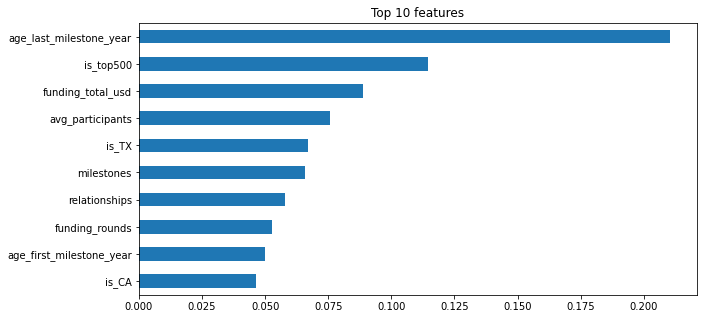

In [22]:
#Feature Importance : XGB 모델

%matplotlib inline
import matplotlib.pyplot as plt

importances = pd.Series(model_xgb.feature_importances_, X2_val.columns)

n = 10
plt.figure(figsize=(10,n/2))
plt.title(f'Top {n} features')
importances.sort_values()[-n:].plot.barh();

In [23]:
#모델링 : 랜덤포레스트 모델

from sklearn.ensemble import RandomForestClassifier
from category_encoders import TargetEncoder

pipeline_rf = make_pipeline(
    OrdinalEncoder(), 
    SimpleImputer(strategy='most_frequent'), 
    RandomForestClassifier(n_estimators = 200, random_state=100, n_jobs=-1, oob_score=True)
)

pipeline_rf.fit(X2_train, y_train)


Pipeline(steps=[('ordinalencoder', OrdinalEncoder(cols=[], mapping=[])),
                ('simpleimputer', SimpleImputer(strategy='most_frequent')),
                ('randomforestclassifier',
                 RandomForestClassifier(n_estimators=200, n_jobs=-1,
                                        oob_score=True, random_state=100))])

In [24]:
##최적의 Hyperparameter찾기

##RandomSearchCV : rf

dists = {  
    'simpleimputer__strategy': ['most_frequent', 'median'], 
    'randomforestclassifier__n_estimators': randint(50, 500), 
    'randomforestclassifier__max_depth': [5, 10, 15, 20, None], 
    'randomforestclassifier__max_features': uniform(0, 1) 
}

clf = RandomizedSearchCV(
    pipeline_rf, 
    param_distributions=dists, 
    n_iter=10, 
    cv=3, 
    scoring='f1',  
    verbose=1,
    n_jobs=-1
)

clf.fit(X2_train, y_train)
print("Optimal Hyperparameter:", clf.best_params_)
print("AUC:", clf.best_score_)
  

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Optimal Hyperparameter: {'randomforestclassifier__max_depth': 5, 'randomforestclassifier__max_features': 0.3115716865329451, 'randomforestclassifier__n_estimators': 464, 'simpleimputer__strategy': 'most_frequent'}
AUC: 0.8646760011345762


In [25]:
print('검증 정확도', pipeline_rf.score(X2_val, y_val))
print('테스트 예측 결과', pipeline_rf.score(X2_test, y_test))

y_pred = pipeline_rf.predict(X2_test)
print('테스트셋 f1_score', f1_score(y_test, y_pred))

검증 정확도 0.8108108108108109
테스트 예측 결과 0.7621621621621621
테스트셋 f1_score 0.815126050420168


In [26]:
#Cross-Validation : rf 모델

from sklearn.model_selection import cross_val_score

k = 3
scores = cross_val_score(pipeline_rf, X2_train, y_train, cv=k, 
                         scoring='roc_auc')

print(f'MAE ({k} folds):', scores)

MAE (3 folds): [0.82446569 0.78436368 0.81775648]


In [27]:
#Permutation Importance : rf 모델

pipeline_rf = Pipeline([
    ('preprocess_pipeline', make_pipeline(OrdinalEncoder(), SimpleImputer())),
    ('model', XGBClassifier(n_estimators=100, random_state=2, n_jobs=-1)) 
])

pipeline_rf.fit(X2_val, y_val)

model_rf = pipeline_xgb.named_steps['model']

permuter = PermutationImportance(
    pipeline_rf.named_steps['model'],
    scoring='roc_auc',
    n_iter=5,
    random_state=42
    )

X2_val_transformed = pipeline_xgb.named_steps['preprocess_pipeline'].transform(X2_val)

permuter.fit(X2_val_transformed, y_val);

feature_names = X2_val.columns.tolist()

eli5.show_weights(
    permuter, 
    top=20,
    feature_names=feature_names
)


Weight,Feature
0.0441 ± 0.0082,funding_total_usd
0.0204 ± 0.0064,age_last_milestone_year
0.0116 ± 0.0079,milestones
0.0115 ± 0.0092,avg_participants
0.0062 ± 0.0070,relationships
0.0037 ± 0.0037,age_first_funding_year
0.0036 ± 0.0042,funding_rounds
0.0028 ± 0.0032,age_last_funding_year
0.0023 ± 0.0006,age_first_milestone_year
0.0008 ± 0.0006,is_CA


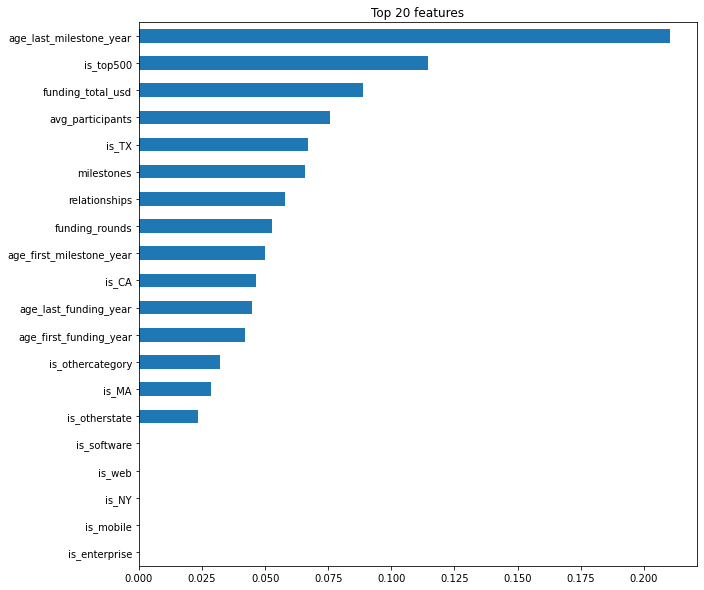

In [28]:
#Feature Importance : rf모델

%matplotlib inline
import matplotlib.pyplot as plt

importances = pd.Series(model_rf.feature_importances_, X2_val.columns)

n = 20
plt.figure(figsize=(10,n/2))
plt.title(f'Top {n} features')
importances.sort_values()[-n:].plot.barh();

# **3. 머신러닝 모델 해석**

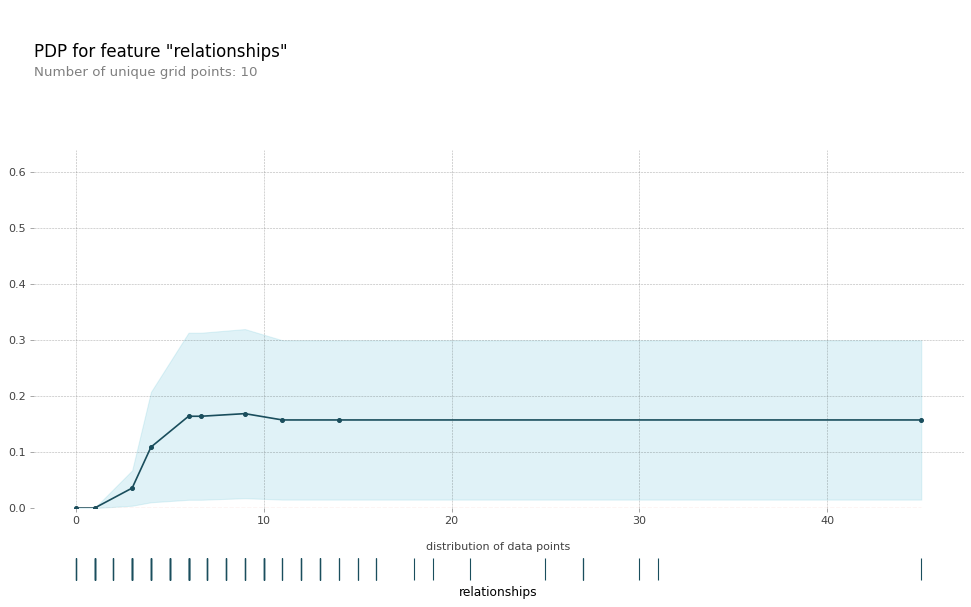

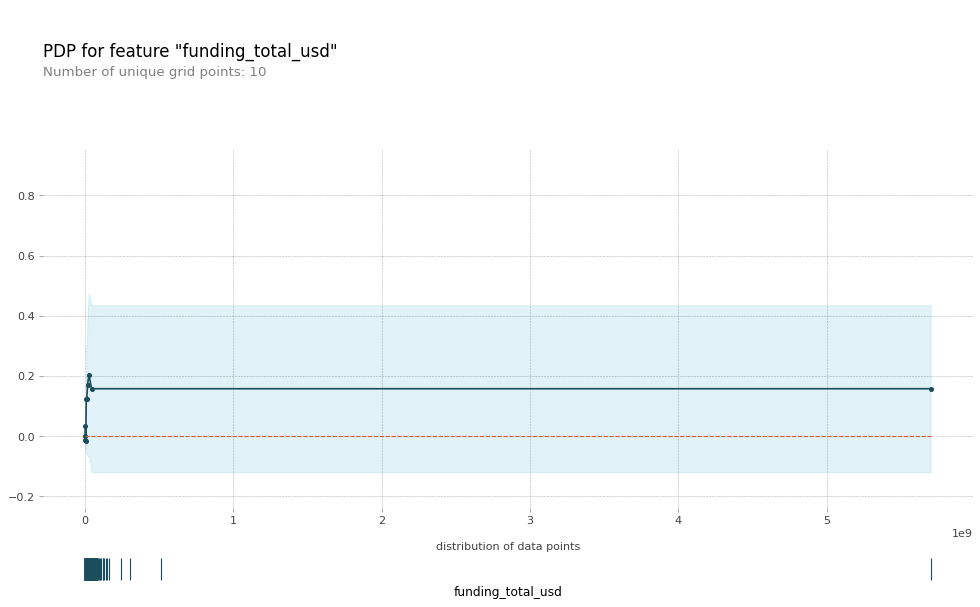

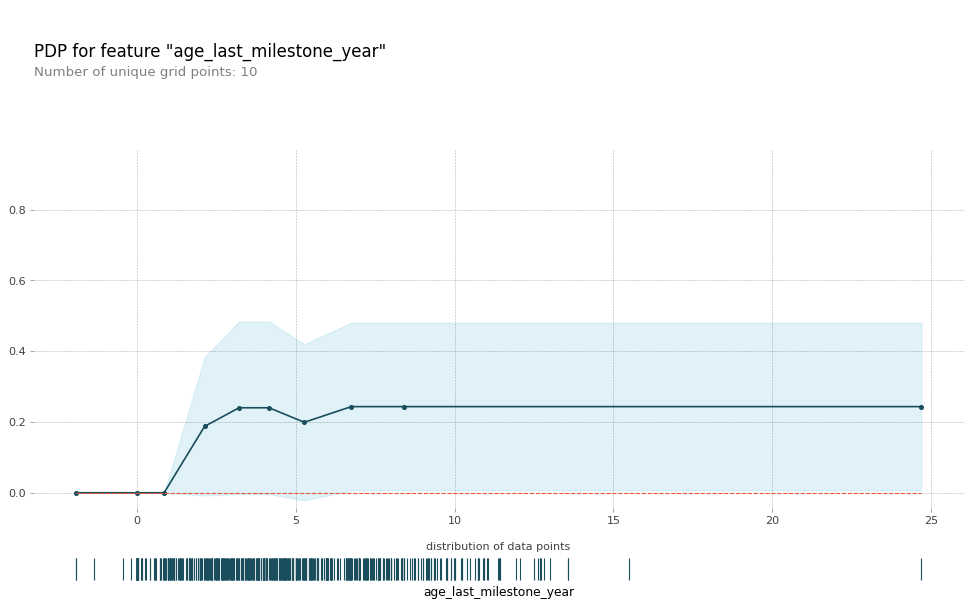

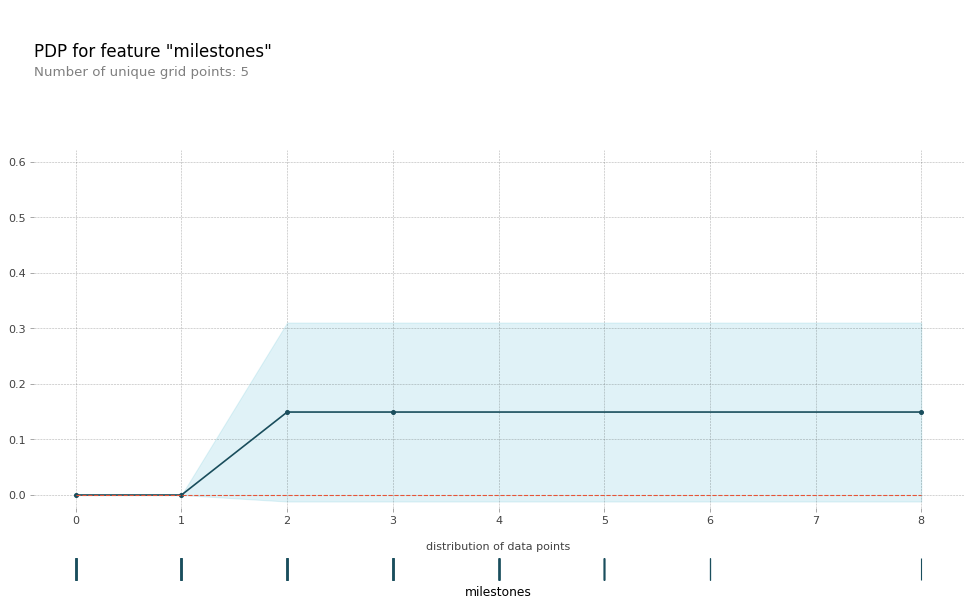

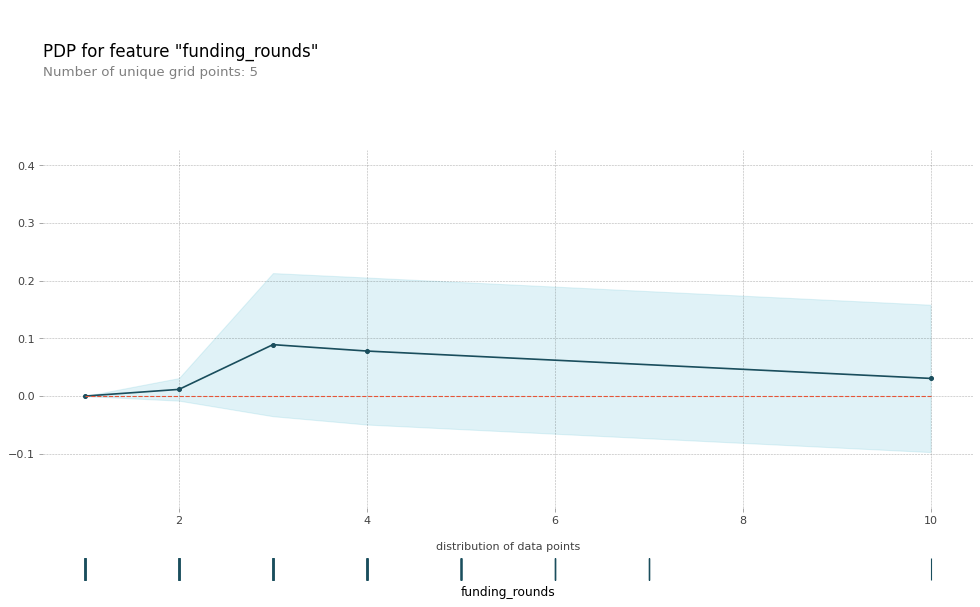

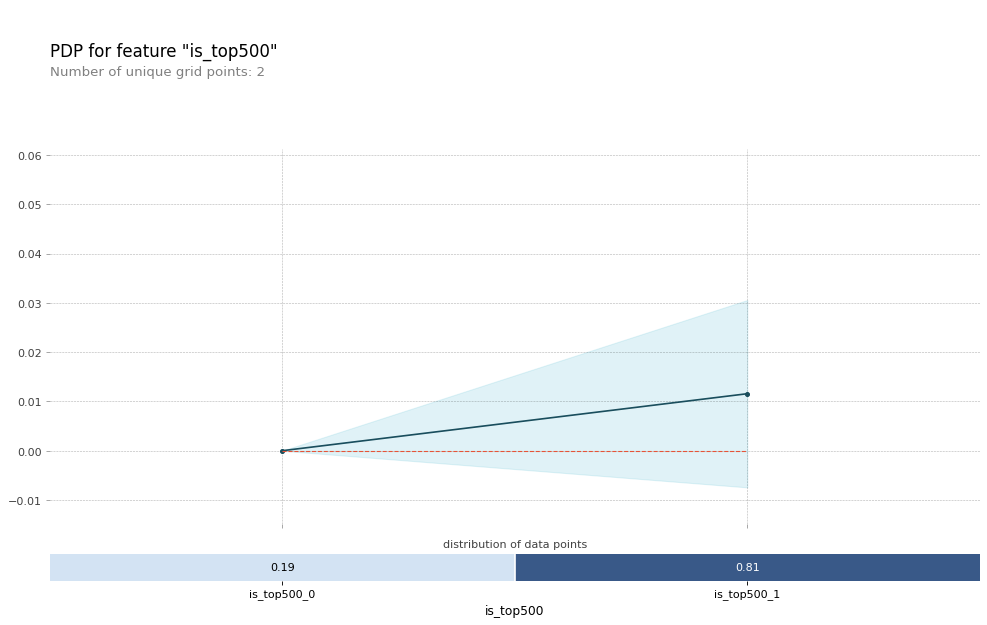

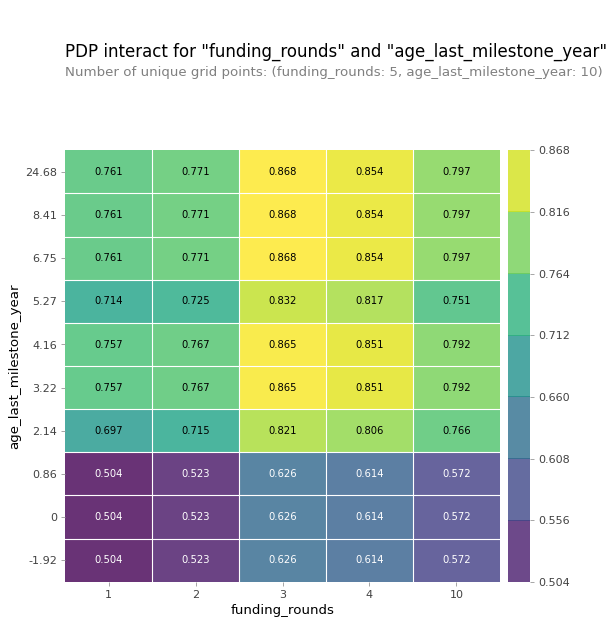

In [40]:
#PDP

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
!pip install PDPbox
import matplotlib.pyplot as plt
from pdpbox.pdp import pdp_isolate, pdp_plot
from pdpbox.pdp import pdp_interact, pdp_interact_plot

plt.rcParams['figure.dpi'] = 80

# relationship이 타겟(status)에 미치는 영향

isolated = pdp_isolate(
    model= pipeline_rf, 
    dataset=X2_val, 
    model_features=X2_val.columns, 
    feature = 'relationships',
    grid_type='percentile',
    num_grid_points=10
)

pdp_plot(isolated, feature_name = 'relationships',plot_pts_dist = True);


# funding_total_usd가 타겟(status)에 미치는 영향

isolated = pdp_isolate(
    model= pipeline_rf, 
    dataset=X2_train, 
    model_features=X2_train.columns, 
    feature = 'funding_total_usd',
    grid_type='percentile',
    num_grid_points=10
)

pdp_plot(isolated, feature_name = 'funding_total_usd',plot_pts_dist = True);


# age_last_milestone_year가 타겟(status)에 미치는 영향

isolated = pdp_isolate(
    model= pipeline_rf, 
    dataset=X2_train, 
    model_features=X2_train.columns, 
    feature = 'age_last_milestone_year',
    grid_type='percentile',
    num_grid_points=10
)

pdp_plot(isolated, feature_name = 'age_last_milestone_year',plot_pts_dist = True);

# milestone이 타겟(status)에 미치는 영향

isolated = pdp_isolate(
    model= pipeline_rf, 
    dataset=X2_train, 
    model_features=X2_train.columns, 
    feature = 'milestones',
    grid_type='percentile',
    num_grid_points=10
)

pdp_plot(isolated, feature_name = 'milestones',plot_pts_dist = True);

# funding_rounds가 타겟(status)에 미치는 영향

isolated = pdp_isolate(
    model= pipeline_rf, 
    dataset=X2_train, 
    model_features=X2_train.columns, 
    feature = 'funding_rounds',
    grid_type='percentile',
    num_grid_points=10
)

pdp_plot(isolated, feature_name = 'funding_rounds',plot_pts_dist = True);

# avg_participants가 타겟(status)에 미치는 영향

isolated = pdp_isolate(
    model= pipeline_rf, 
    dataset=X2_train, 
    model_features=X2_train.columns, 
    feature = 'is_top500',
    grid_type='percentile',
    num_grid_points=10
)

pdp_plot(isolated, feature_name = 'is_top500',plot_pts_dist = True);


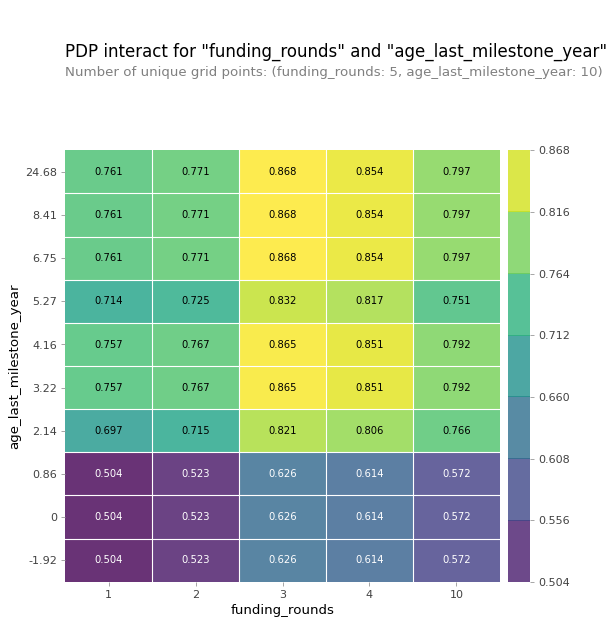

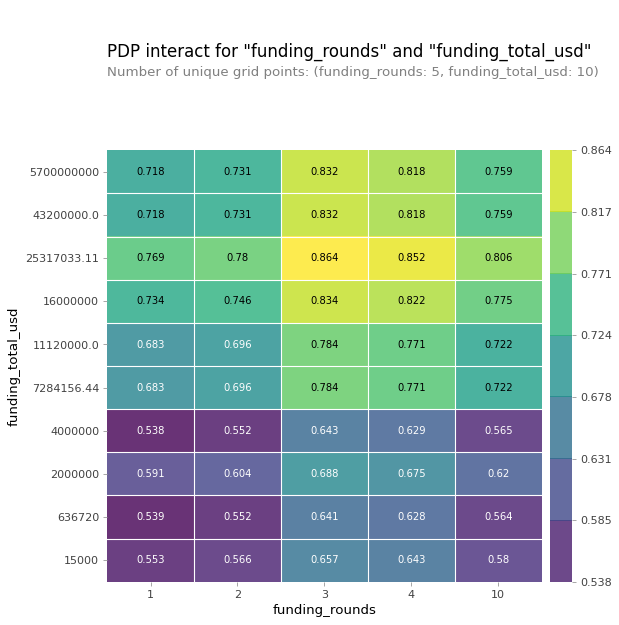

In [42]:
# funding_rounds와 age_last_milestone_year가 타겟(status)에 미치는 영향

features = ['funding_rounds', 'age_last_milestone_year']

interaction = pdp_interact(
    model=pipeline_rf, 
    dataset=X2_train,
    model_features=X2_train.columns, 
    features=features
)

pdp_interact_plot(interaction, plot_type='grid', 
                  feature_names=features);

                  
# funding_rounds와 age_last_milestone_year가 타겟(status)에 미치는 영향

features = ['funding_rounds', 'funding_total_usd']

interaction = pdp_interact(
    model=pipeline_rf, 
    dataset=X2_train,
    model_features=X2_train.columns, 
    features=features
)

pdp_interact_plot(interaction, plot_type='grid', 
                  feature_names=features);

In [31]:
#SHAP : rf

!pip install shap
import shap

explainer = shap.TreeExplainer(model_rf)
shap_values = explainer.shap_values(X2_train)

#Force_Plot
shap.initjs()
shap.force_plot(
    base_value=explainer.expected_value, 
    shap_values=shap_values,
    features=X2_train
)

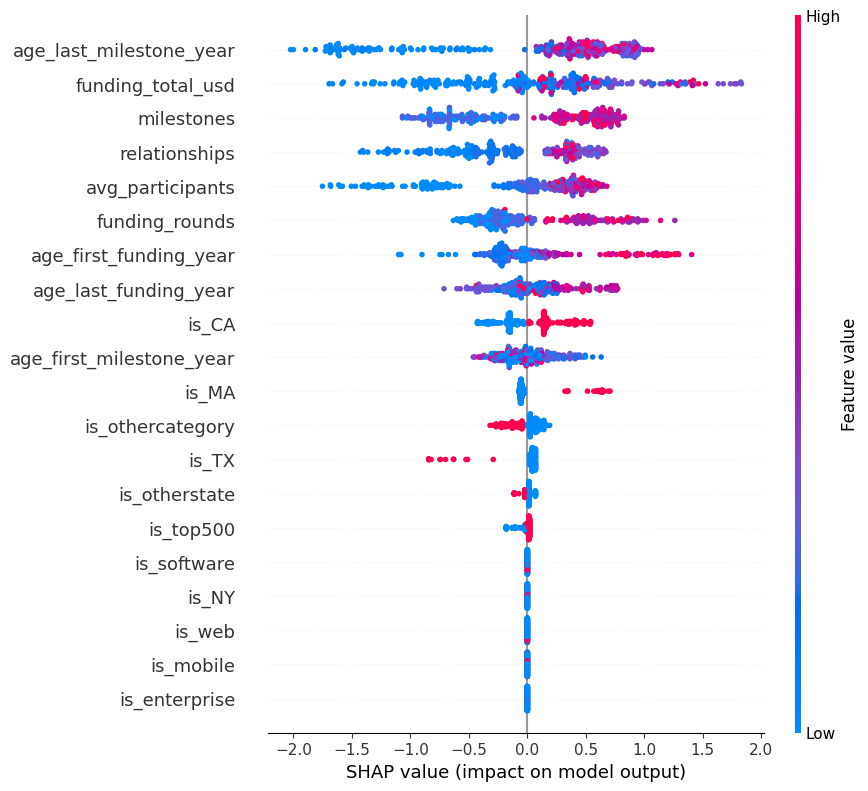

In [32]:
#Summary_Plot : rf
shap_values = explainer.shap_values(X2_train.iloc[:300])
shap.summary_plot(shap_values, X2_train.iloc[:300])

In [33]:
#SHAP : xgb

!pip install shap
import shap

explainer = shap.TreeExplainer(model_xgb)
shap_values = explainer.shap_values(X2_train)

#Force_Plot
shap.initjs()
shap.force_plot(
    base_value=explainer.expected_value, 
    shap_values=shap_values,
    features=X2_train
)

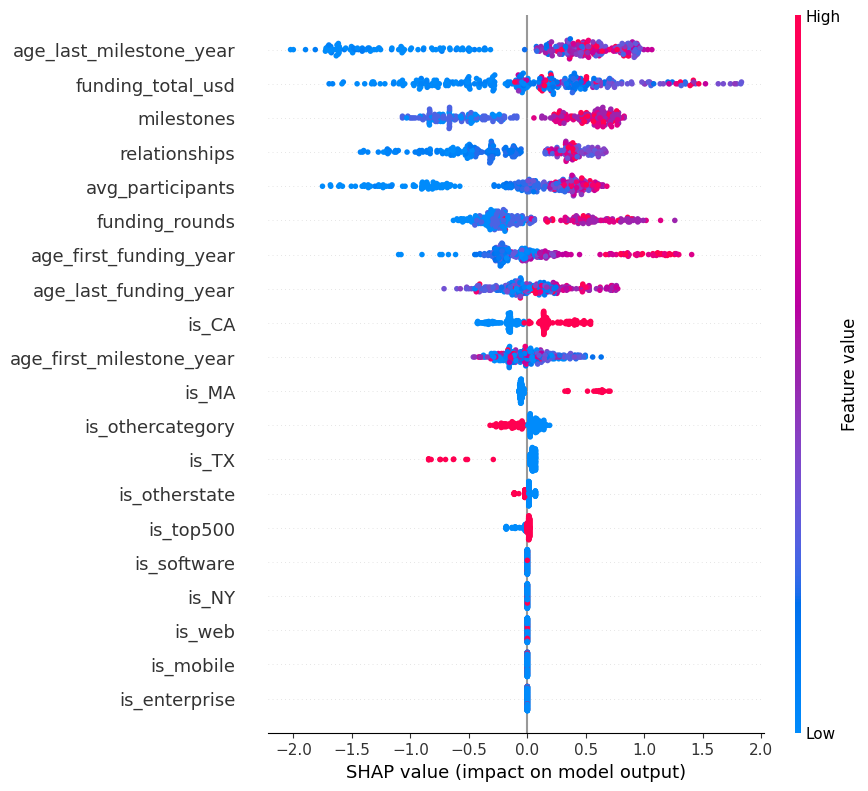

In [34]:
#Summary_Plot
shap_values = explainer.shap_values(X2_train.iloc[:300])
shap.summary_plot(shap_values, X2_train.iloc[:300])